## Loading data

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset_orig = pd.read_csv('./exams.csv')
data = dataset_orig.copy() # We copy the data and work on it

In [3]:
data.head() # Analyzing the dataset

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# Separate features and target
X = data[['exam_1', 'exam_2']].values  # Features: exam_1, exam_2
y = data['admitted'].values  # Target: admitted (1:admitted or 0:failed)

# It gives numpy array

In [5]:
# Normalize the data using MinMaxScaler 
#(The MinMaxScaler works by subtracting the minimum value (to make values start from zero) and then dividing by (x_max - x_min) to make it less or equal to 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#X_scaled

## Visualization

In [7]:
import matplotlib.pyplot as plt

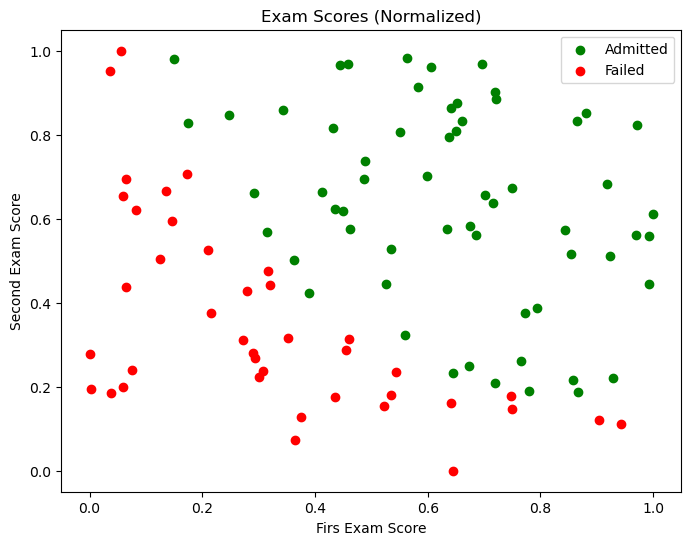

In [8]:
# Plot first exam score vs second exam score
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], color='green', label='Admitted')
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], color='red', label='Failed')
plt.xlabel('Firs Exam Score')
plt.ylabel('Second Exam Score')
plt.title('Exam Scores (Normalized)')
plt.legend()
plt.show()

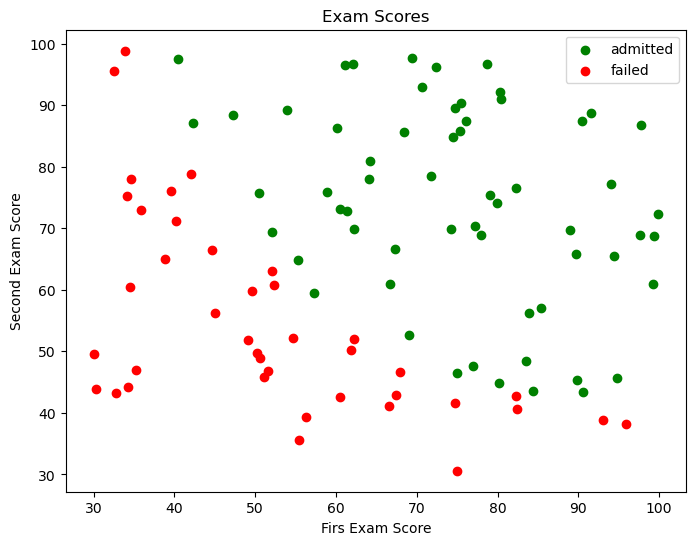

In [9]:
# Optional (I also plot original values as it was not normilized in assignment example)
plt.figure(figsize=(8,6))
plt.scatter(X[y==1][:,0],X[y==1][:,1],color = 'green', label='admitted')
plt.scatter(X[y==0][:,0],X[y==0][:,1], color = 'red', label='failed')
plt.xlabel('Firs Exam Score')
plt.ylabel('Second Exam Score')
plt.title('Exam Scores')
plt.legend()
plt.show()

## Implementation of Logistic Regression from scratch

In [10]:
import numpy as np

In [11]:
# Implement a function which returns sigmoid of a value given the value
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
# Implement the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [13]:
# (Optional) implement the cost function by using matrix multiplication
def cost_function(X, y, theta):
    
    m = len(y)  
    predictions = sigmoid(X @ theta)
    cost = -(1 / m) * (y.T @ np.log(predictions) + (1 - y).T @ np.log(1 - predictions))
    
    return cost


In [14]:
# Write code that finds the best fit parameters for logistic regression using gradient descent from scratch.
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (y - predictions))
        theta = theta + learning_rate * gradient
        
        # Calculate cost at each iteration and append it to the cost history
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [26]:
X_bias = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled]) # Add a bias column

# Initializing
theta_init = np.zeros(X_bias.shape[1]) 
learning_rate = 0.1
num_iterations = 50000

# Training the model
theta_optimal, cost_history = gradient_descent(X_bias, y, theta_init, learning_rate, num_iterations)

print("Optimal Parameters (theta):", theta_optimal)


Optimal Parameters (theta): [-11.96882487  13.48246067  12.85734129]


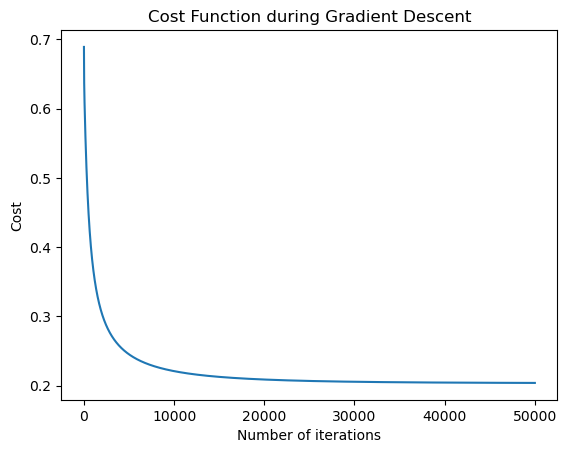

In [27]:
# Plot the cost function history
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()

exam

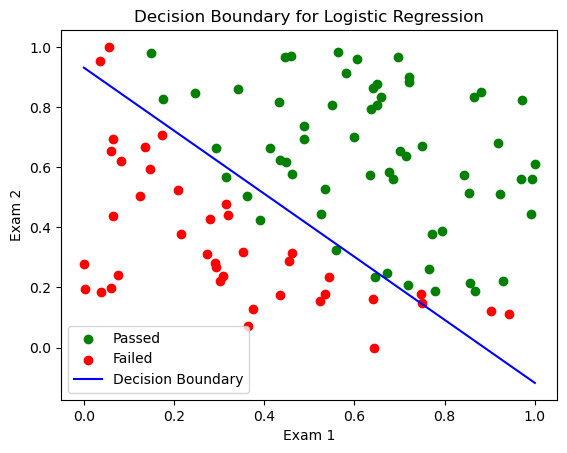

In [28]:
theta_0, theta_1, theta_2 = theta_optimal # Let us seperate thetas

# For decision boundry,we use the equation: theta_0 +  theta_1 * x1 + theta_2 * x2 = 0
exam_1_values = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
exam_2_values = ( - (theta_0) - ((theta_1) * exam_1_values) )/ theta_2

plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], color='green', label='Passed')
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], color='red', label='Failed')

plt.plot(exam_1_values, exam_2_values, label="Decision Boundary", color='blue')

plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.title('Decision Boundary for Logistic Regression')
plt.legend()

plt.show()

In [29]:
# Predictions

from sklearn.metrics import accuracy_score


def predict_train(X, theta):
    predictions = sigmoid(np.dot(X, theta))
    # Classification: 1 if probability >= 0.5, otherwise 0
    return (predictions >= 0.5).astype(int)

y_pred = predict_train(X_bias, theta_optimal)

# Calculate the accuracy score
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on the training data: {accuracy:.2f}")


# Checking given data points
def predict_test(X, theta):
    X_scaled = scaler.transform(X)
    X_bias = np.hstack([np.ones((X_scaled.shape[0],1)),X_scaled])
    predictions = sigmoid(np.dot(X_bias, theta))
    return (predictions>=0.5).astype(int) 
    
    

test_data = np.array([[55, 70], [40, 60]])

prediction_test = predict_test(test_data, theta_optimal)


print(f"Prediction for {test_data[0]}: {prediction_test[0]}")
print(f"Prediction for {test_data[1]}: {prediction_test[1]}")


Accuracy on the training data: 0.89
Prediction for [55 70]: 1
Prediction for [40 60]: 0


## Logistic Regression using library

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

#Train the model by library
data = pd.read_csv('exams.csv')
X = data[['exam_1', 'exam_2']].values  
y = data['admitted'].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

# Make predictions on the training data
y_pred = model.predict(X_scaled)

# Calculate accuracy of training 
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on the training data (with library: scikit-learn): {accuracy:.2f}")

# Predrctions for specific test cases
test_data_1 = np.array([[55, 70]])
test_data_2 = np.array([[40, 60]])

test_data_1_scaled = scaler.transform(test_data_1)
test_data_2_scaled = scaler.transform(test_data_2)

prediction_1 = model.predict(test_data_1_scaled)
prediction_2 = model.predict(test_data_2_scaled)

print(f"Prediction for {test_data_1[0]}: {prediction_1[0]}")
print(f"Prediction for {test_data_2[0]}: {prediction_2[0]}")

Accuracy on the training data (with library: scikit-learn): 0.93
Prediction for [55 70]: 1
Prediction for [40 60]: 0
